In [22]:
import pandas as pd
import numpy as np
from datetime import date

In [23]:
client = pd.read_csv("dados_tratados/client.csv", sep=",", na_values=["?"])
client.head()


,client_id,district_id,sex,birth_date
0,1,18,f,1970-12-13
1,2,1,m,1945-02-04
2,3,1,f,1940-10-09
3,4,5,m,1956-12-01
4,5,5,f,1960-07-03


In [24]:
collected_date = pd.to_datetime("2000-01-01", format="%Y-%m-%d")


In [25]:
def getAge(row):
    date = pd.to_datetime(row['birth_date'], format='%Y-%m-%d')
    return collected_date.year - date.year - ((collected_date.month, collected_date.day) < (date.month, date.day))

In [26]:
client['age'] = client.apply(lambda x : getAge(x), axis=1)


In [27]:
def getAgeCaterory(row):
        age = row['age']
        if age <18:
            return "-18"
        elif age >= 18 and age <= 25:
            return "18-25"
        elif age > 25 and age <= 40:
            return "25-40"
        elif age > 40 and age <= 50:
            return "40-50"
        elif age > 50 and age <= 65:
            return "25-50"
        else: 
            return ">65"


In [28]:
client['age_category'] = client.apply(lambda x : getAgeCaterory(x), axis=1)
client.head()

,client_id,district_id,sex,birth_date,age,age_category
0,1,18,f,1970-12-13,29,25-40
1,2,1,m,1945-02-04,54,25-50
2,3,1,f,1940-10-09,59,25-50
3,4,5,m,1956-12-01,43,40-50
4,5,5,f,1960-07-03,39,25-40


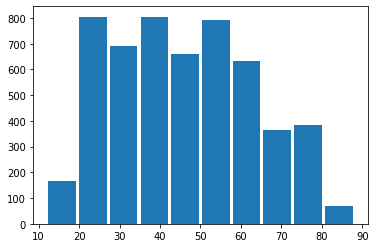

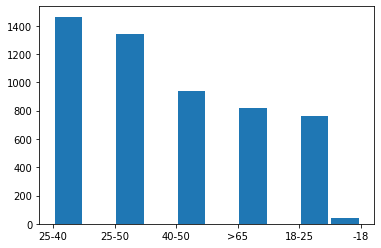

In [29]:
import matplotlib.pyplot as plt
plt.hist(client["age"], 10, rwidth=0.9)
plt.show()
plt.hist(client["age_category"], 10, rwidth=0.9)
plt.show()

In [30]:
client = client.drop(client.columns[[3]], axis=1)
client.head()

,client_id,district_id,sex,age,age_category
0,1,18,f,29,25-40
1,2,1,m,54,25-50
2,3,1,f,59,25-50
3,4,5,m,43,40-50
4,5,5,f,39,25-40


In [31]:
demographics = pd.read_csv("dados_tratados/demographics.csv", sep=",", header=0)
demographics = demographics.rename(columns={"code" : "district_id"})



In [32]:
client_demographics = pd.merge(client, demographics, on="district_id")
client_demographics.head()

,client_id,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,1,18,f,29,25-40,70699,65.3,8968,2.4,0.52,25.81,3.09
1,420,18,m,21,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
2,499,18,f,64,25-50,70699,65.3,8968,2.4,0.52,25.81,3.09
3,519,18,m,19,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09
4,682,18,m,20,18-25,70699,65.3,8968,2.4,0.52,25.81,3.09


In [33]:
client_demographics = client_demographics.sort_values(by=['client_id'])
client_demographics.to_csv("dados_limpos/client_demographics.csv", index=False, float_format="%.2f")


### Associantion between client_demo and Account ID's

In [34]:
client_acount_association = pd.read_csv("dados/disp.csv", sep=";", header=0)
client_acount_association.head()


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


### Association between disposition and credit card

In [35]:
client_card = pd.read_csv("dados/card_dev.csv", sep=";", header=0)
client_card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215


In [36]:
disp_card = pd.merge(client_acount_association, client_card, on="disp_id")
disp_card.head()

,disp_id,client_id,account_id,type_x,card_id,type_y,issued
0,41,41,33,OWNER,3,gold,950903
1,51,51,43,OWNER,5,junior,950424
2,77,77,66,OWNER,10,classic,961207
3,83,83,71,OWNER,12,junior,960911
4,87,87,73,OWNER,13,classic,940629


In [37]:
disp_card = disp_card.drop(['disp_id', 'card_id'], axis=1)

In [38]:
disp_card = disp_card.rename(columns={'type_y': 'typeCard', 'type_x': 'typeDisposition'})

In [39]:
disp_card.head()

,client_id,account_id,typeDisposition,typeCard,issued
0,41,33,OWNER,gold,950903
1,51,43,OWNER,junior,950424
2,77,66,OWNER,classic,961207
3,83,71,OWNER,junior,960911
4,87,73,OWNER,classic,940629


In [40]:
disp_card = disp_card.sort_values(by=['client_id'])
disp_card.to_csv("dados_limpos/disp_credit.csv", index=False, float_format="%.2f")


Merge the two tables by client_id

In [41]:
merged_client_demo_account = pd.merge(disp_card, client_demographics, on= 'client_id')
merged_client_demo_account.to_csv("dados_limpos/client_demo_account.csv", index=False, float_format="%.2f")
merged_client_demo_account.head()



,client_id,account_id,typeDisposition,typeCard,issued,district_id,sex,age,age_category,no. of inhabitants,ratio of urban inhabitants,average salary,crime_increase,unemployment_increase,crime_avg,unemployment_avg
0,41,33,OWNER,gold,950903,22,m,31,25-40,58400,52.4,8620,0.48,0.15,18.89,1.18
1,51,43,OWNER,junior,950424,36,f,20,18-25,159617,85.2,9198,2.11,0.95,37.36,3.81
2,77,66,OWNER,classic,961207,1,f,43,40-50,1204953,100.0,12541,11.15,0.14,76.68,0.36
3,83,71,OWNER,junior,960911,1,f,21,18-25,1204953,100.0,12541,11.15,0.14,76.68,0.36
4,87,73,OWNER,classic,940629,72,f,53,25-50,226122,62.6,8994,-2.05,0.99,41.75,4.29


NameError: name 'merged_client_demo_accoun' is not defined

In [42]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.relplot(data= merged_client_demo_account, x="unemployment_increase", y="status")


ModuleNotFoundError: No module named 'seaborn'

# Qualquer titulo

### Merge the Loan and Transaction table with account


In [43]:
loan = pd.read_csv("dados/loan_dev.csv", sep=";", header=0)
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


#### Clean Transaction data

In [44]:
trans = pd.read_csv("dados/trans_dev.csv", sep=";", header=0)
trans.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [ ]:
trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation      70761
amount             0
balance            0
k_symbol      185244
bank          299443
account       294456
dtype: int64

In [49]:
merge = pd.merge(trans, loan, on='account_id')
merge.head()

,trans_id,account_id,date_x,type,operation,amount_x,balance,k_symbol,bank,account,loan_id,date_y,amount_y,duration,payments,status
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN,6077,931122,79608,24,3317,1
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0,6077,931122,79608,24,3317,1
2,3669814,5270,930131,credit,NaN,110.2,45659.2,interest credited,NaN,NaN,6077,931122,79608,24,3317,1
3,1549098,5270,930212,withdrawal,withdrawal in cash,9600.0,36059.2,NaN,NaN,NaN,6077,931122,79608,24,3317,1
4,1548751,5270,930214,credit,collection from another bank,44749.0,80808.2,NaN,IJ,80269753.0,6077,931122,79608,24,3317,1


<AxesSubplot:>

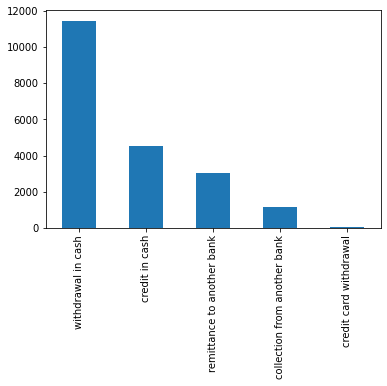

In [50]:
merge['operation'].value_counts().plot(kind='bar')

In [54]:
merge['duration'].describe()

count    24494.000000
mean        36.094554
std         17.230049
min         12.000000
25%         24.000000
50%         36.000000
75%         48.000000
max         60.000000
Name: duration, dtype: float64

<AxesSubplot:>

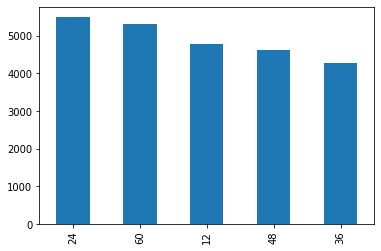

In [56]:
merge['duration'].value_counts().plot(kind='bar')

In [48]:
merge['type'].describe()


count          24494
unique             3
top       withdrawal
freq           13730
Name: type, dtype: object

<AxesSubplot:>

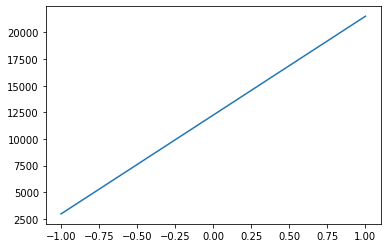

In [62]:
merge['status'].value_counts().plot(x='amount_x', y = 'amount_y')

<AxesSubplot:>

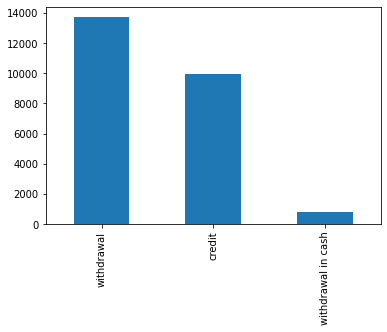

In [ ]:
merge['type'].value_counts().plot(kind='bar')

In [58]:
merge['bank'].describe()

count     4172
unique      13
top         EF
freq       449
Name: bank, dtype: object

<AxesSubplot:>

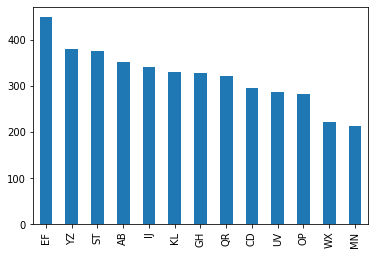

In [59]:
merge['bank'].value_counts().plot(kind='bar')

In [ ]:
merge['bank'].describe()

In [ ]:
merge.corr()

,trans_id,account_id,date_x,amount_x,balance,account,loan_id,date_y,amount_y,duration,payments,status
trans_id,1.000000,0.730371,-0.025121,-0.187568,0.005802,-0.004157,0.730089,-0.026257,-0.010869,-0.021905,0.007769,0.082070
account_id,0.730371,1.000000,-0.019500,0.012000,0.048992,-0.004597,0.999854,-0.041919,-0.022425,-0.031803,0.005414,0.136425
date_x,-0.025121,-0.019500,1.000000,-0.014588,0.013204,0.006802,-0.020599,0.832331,0.124943,0.187537,-0.001061,0.086638
amount_x,-0.187568,0.012000,-0.014588,1.000000,0.483082,0.219267,0.011748,0.009549,0.088110,-0.025263,0.130100,0.008215
balance,0.005802,0.048992,0.013204,0.483082,1.000000,0.098041,0.048577,0.041381,0.068698,-0.055999,0.140668,0.095336
account,-0.004157,-0.004597,0.006802,0.219267,0.098041,1.000000,-0.005580,-0.004063,-0.045632,-0.014599,-0.043374,0.122683
loan_id,0.730089,0.999854,-0.020599,0.011748,0.048577,-0.005580,1.000000,-0.043296,-0.022998,-0.032348,0.004766,0.135477
date_y,-0.026257,-0.041919,0.832331,0.009549,0.041381,-0.004063,-0.043296,1.000000,0.127169,0.207419,-0.007509,0.055215
amount_y,-0.010869,-0.022425,0.124943,0.088110,0.068698,-0.045632,-0.022998,0.127169,1.000000,0.592526,0.681284,-0.205194
duration,-0.021905,-0.031803,0.187537,-0.025263,-0.055999,-0.014599,-0.032348,0.207419,0.592526,1.000000,-0.076225,-0.075314


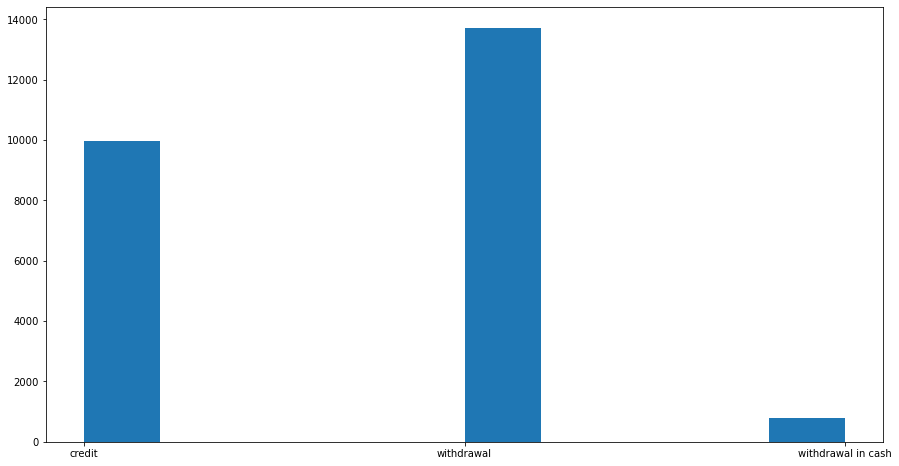

In [ ]:
plt.figure(figsize=(15,8),facecolor='white',edgecolor='red')
plt.hist(merge["type"])
plt.show()

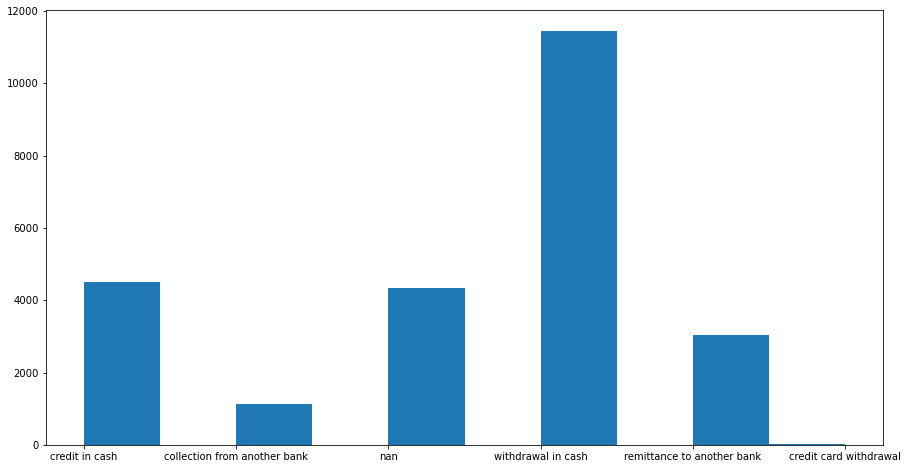

In [ ]:
plt.figure(figsize=(15,8),facecolor='white',edgecolor='red')
plt.hist(merge["operation"])
plt.show()
